### [최소 스패닝 트리] Gold IV 1197 최소 스패닝 트리

### 문제
그래프가 주어졌을 때, 그 그래프의 최소 스패닝 트리를 구하는 프로그램을 작성하시오.

최소 스패닝 트리는, 주어진 그래프의 모든 정점들을 연결하는 부분 그래프 중에서 그 가중치의 합이 최소인 트리를 말한다.

### 입력
첫째 줄에 정점의 개수 V(1 ≤ V ≤ 10,000)와 간선의 개수 E(1 ≤ E ≤ 100,000)가 주어진다. 다음 E개의 줄에는 각 간선에 대한 정보를 나타내는 세 정수 A, B, C가 주어진다. 이는 A번 정점과 B번 정점이 가중치 C인 간선으로 연결되어 있다는 의미이다. C는 음수일 수도 있으며, 절댓값이 1,000,000을 넘지 않는다.

그래프의 정점은 1번부터 V번까지 번호가 매겨져 있고, 임의의 두 정점 사이에 경로가 있다. 최소 스패닝 트리의 가중치가 -2,147,483,648보다 크거나 같고, 2,147,483,647보다 작거나 같은 데이터만 입력으로 주어진다.

### 출력
첫째 줄에 최소 스패닝 트리의 가중치를 출력한다.

### 입출력 예

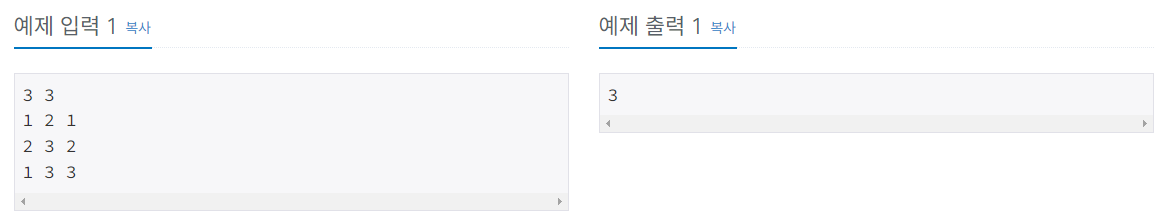

### 내 풀이

In [1]:
import sys
from queue import PriorityQueue

input = sys.stdin.readline
N, M = map(int, input().split())

# 우선순위 큐를 사용하여 간선 정보를 저장
pq = PriorityQueue()

# 각 노드의 부모 노드 초기화
parent = [0] * (N + 1)
for i in range(N + 1):
    parent[i] = i

# 간선 정보 입력 및 우선순위 큐에 삽입
for i in range(M):
    s, e, w = map(int, input().split())
    pq.put((w, s, e))  # 가중치를 기준으로 정렬하기 위해 가중치를 맨 앞에 놓음

# 특정 노드의 부모 노드 찾기 함수
def find(a):
    if a == parent[a]:
        return a
    else:
        parent[a] = find(parent[a])  # 경로 압축을 위해 부모 노드를 찾으면서 갱신
        return parent[a]

# 두 노드를 연결하는 함수
def union(a, b):
    a = find(a)
    b = find(b)
    if a != b:  # 사이클이 생성되지 않으면 두 노드 연결
        parent[b] = a

useEdge = 0  # 사용한 간선 수 초기화
result = 0   # 결과값 초기화

# 크루스칼 알고리즘 수행
while useEdge < N - 1:  # 사용한 간선이 N-1개가 될 때까지 반복
    w, s, e = pq.get()  # 가중치가 가장 작은 간선 정보 추출
    if find(s) != find(e):  # 두 노드의 부모가 다르다면 사이클 생성하지 않는다는 의미
        union(s, e)  # 두 노드 연결
        result += w  # 결과값에 가중치 추가
        useEdge += 1  # 사용한 간선 수 증가

print(result)  # 최소 스패닝 트리의 가중치 합 출력


### 지피티는 이렇게 풀더라

In [ ]:
import sys
from queue import PriorityQueue

input = sys.stdin.readline

V, E = map(int, input().split())

# 우선순위 큐를 사용하여 간선 정보 저장
pq = PriorityQueue()

# 간선 정보 입력 및 우선순위 큐에 삽입
for _ in range(E):
    a, b, c = map(int, input().split())
    pq.put((c, a, b))  # 가중치를 기준으로 정렬하기 위해 가중치를 맨 앞에 놓음

parent = [i for i in range(V + 1)]  # 각 노드의 부모 노드 초기화

# 특정 노드의 부모 노드 찾기 함수
def find(a):
    if a == parent[a]:
        return a
    else:
        parent[a] = find(parent[a])  # 경로 압축을 위해 부모 노드를 찾으면서 갱신
        return parent[a]

# 두 노드를 연결하는 함수
def union(a, b):
    a = find(a)
    b = find(b)
    if a != b:  # 사이클이 생성되지 않으면 두 노드 연결
        parent[b] = a

mst_weight = 0  # MST의 가중치 합 초기화

# 크루스칼 알고리즘 수행
while not pq.empty():
    w, a, b = pq.get()  # 가중치가 가장 작은 간선 정보 추출
    if find(a) != find(b):  # 두 노드의 부모가 다르다면 사이클 생성하지 않는다는 의미
        union(a, b)  # 두 노드 연결
        mst_weight += w  # MST의 가중치에 더함

print(mst_weight)  # 최소 스패닝 트리의 가중치 합 출력
